In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
df1=pd.read_csv('data.csv')

In [191]:
df1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [192]:
# Data Exploration
# Display basic statistics about the dataset
print(df1.describe())

         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.000000    103.000000  103.000000       103.000000      103.000000   
mean     7.396117    179.194175  338.786408       189.165049      444.271845   
std      3.017430     43.573030  126.014444        29.566839      203.949253   
min      2.100000    123.000000   95.000000       104.000000      170.000000   
25%      5.100000    150.000000  250.000000       168.000000      260.000000   
50%      7.300000    160.000000  340.000000       180.000000      440.000000   
75%      9.000000    200.000000  400.000000       203.000000      555.000000   
max     22.400000    410.000000  970.000000       273.000000      940.000000   

            Seats      PriceEuro  
count  103.000000     103.000000  
mean     4.883495   55811.563107  
std      0.795834   34134.665280  
min      2.000000   20129.000000  
25%      5.000000   34429.500000  
50%      5.000000   45000.000000  
75%      5.000000   65000.000000  

In [193]:
# Check for missing values
print(df1.isnull().sum())

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


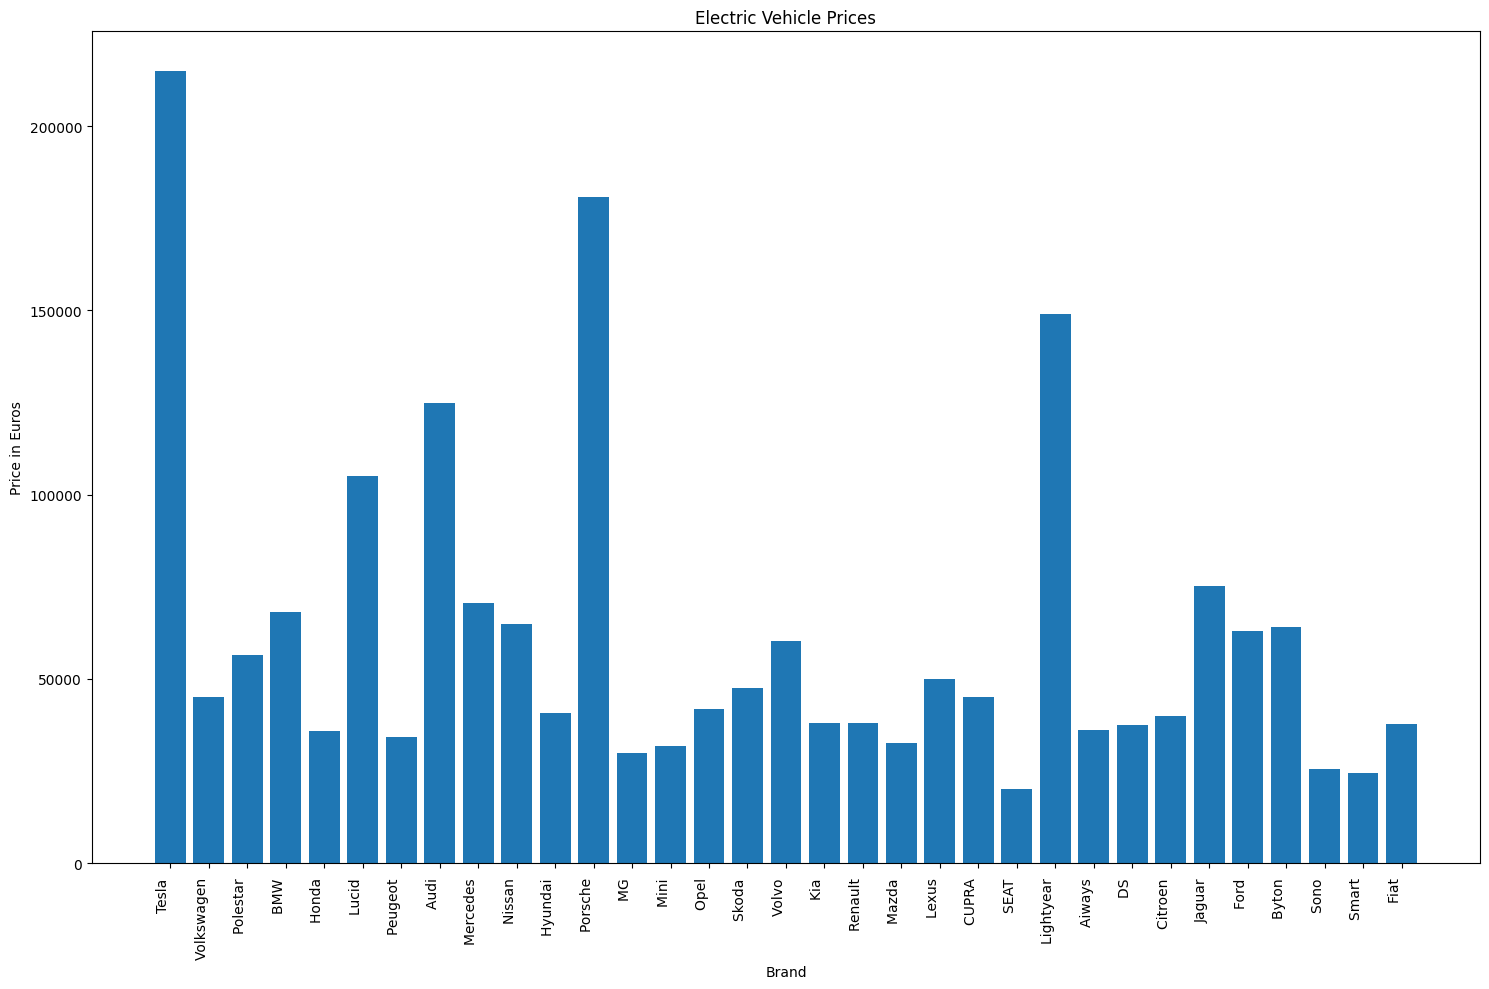

In [194]:

# Create a bar plot
plt.figure(figsize=(15,10))
plt.bar(df1['Brand'],df1['PriceEuro'])
plt.xlabel('Brand')
plt.ylabel('Price in Euros')
plt.title('Electric Vehicle Prices')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


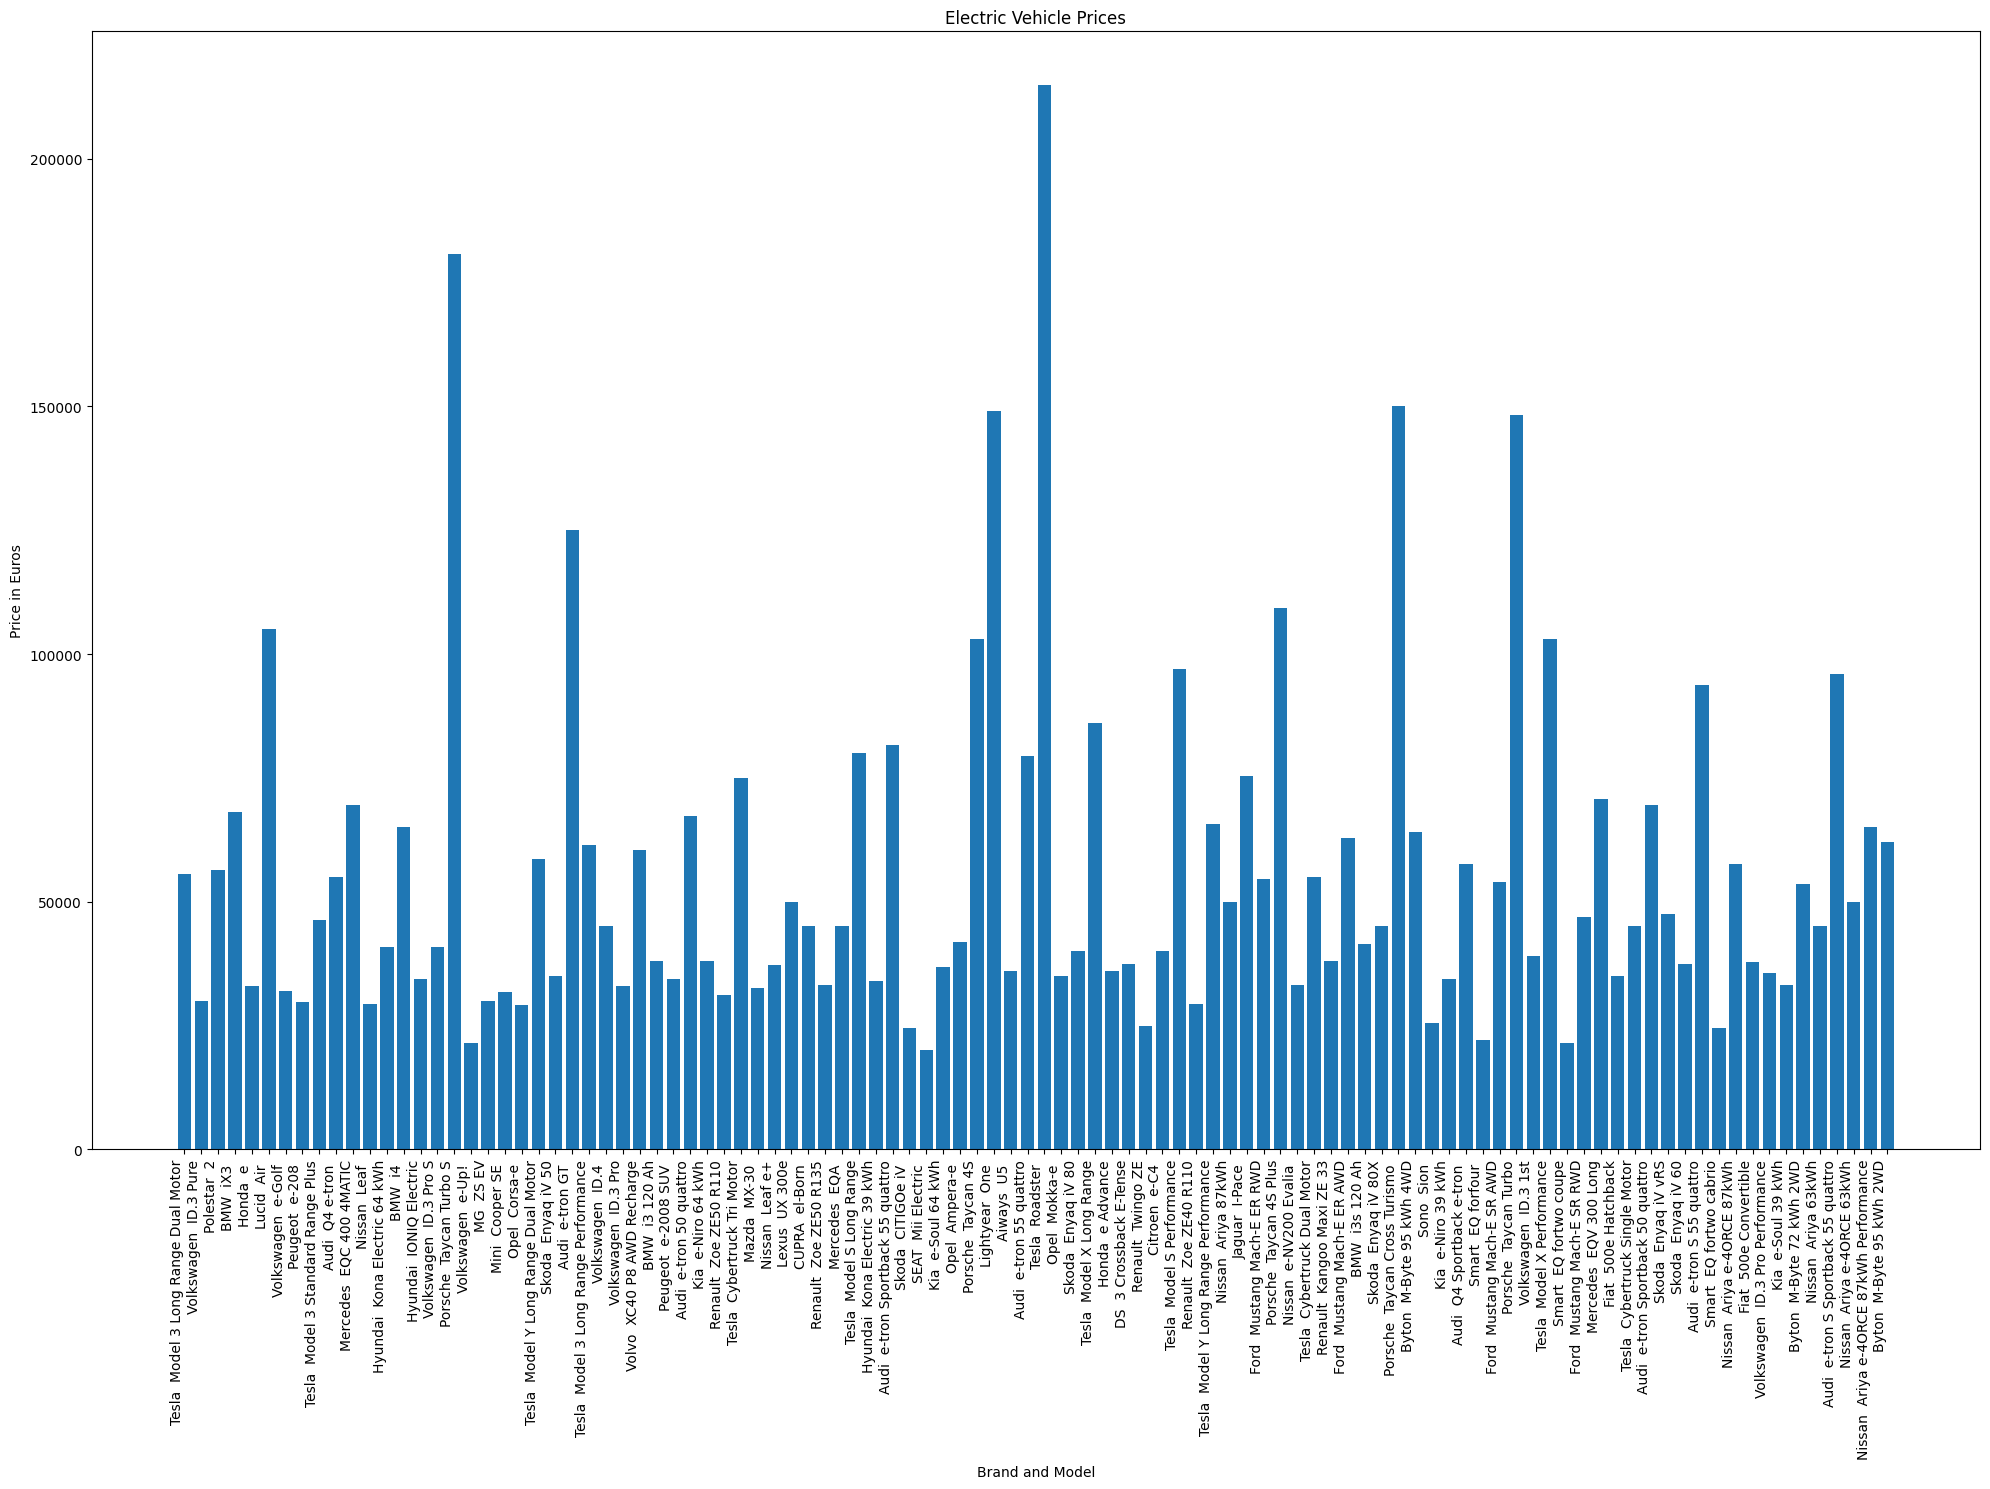

In [195]:

# Create a bar plot
plt.figure(figsize=(20,15))
plt.bar(df1['Brand'] + ' ' + df1['Model'], df1['PriceEuro'])
plt.xlabel('Brand and Model')
plt.ylabel('Price in Euros')
plt.title('Electric Vehicle Prices')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


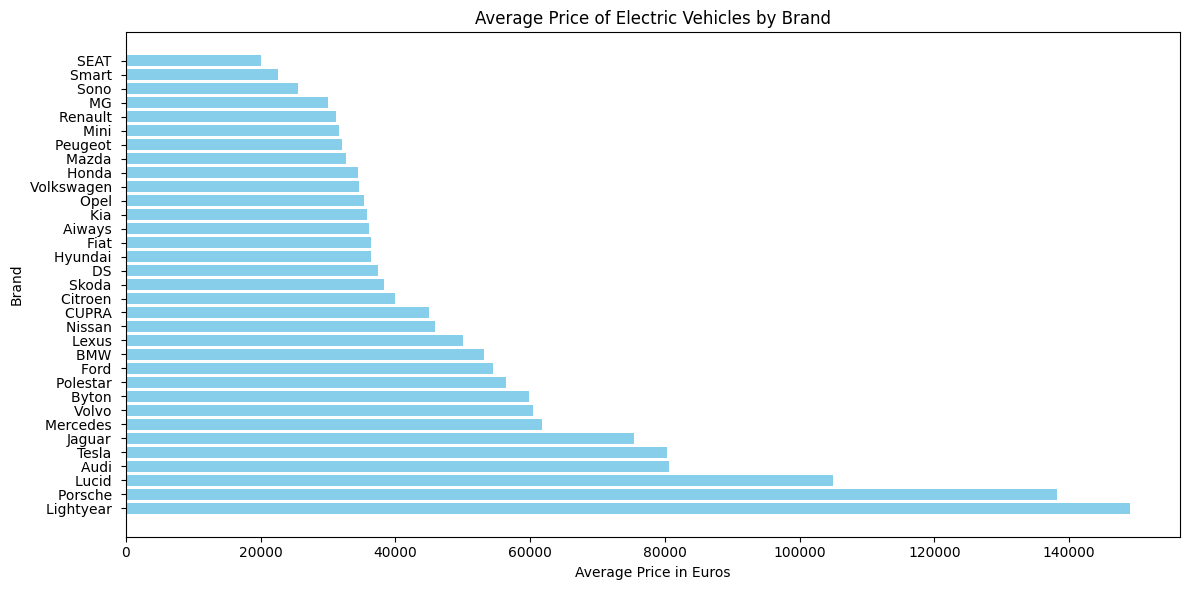

In [196]:

# Grouping the data by 'Brand' and calculating the mean price for each brand
brand_prices = df1.groupby('Brand')['PriceEuro'].mean().reset_index()

# Sorting the brands by average price in ascending order
brand_prices = brand_prices.sort_values(by='PriceEuro', ascending=True)

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.barh(brand_prices['Brand'], brand_prices['PriceEuro'], color='skyblue')
plt.xlabel('Average Price in Euros')
plt.ylabel('Brand')
plt.title('Average Price of Electric Vehicles by Brand')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most affordable brands at the top

# Display the plot
plt.tight_layout()
plt.show()


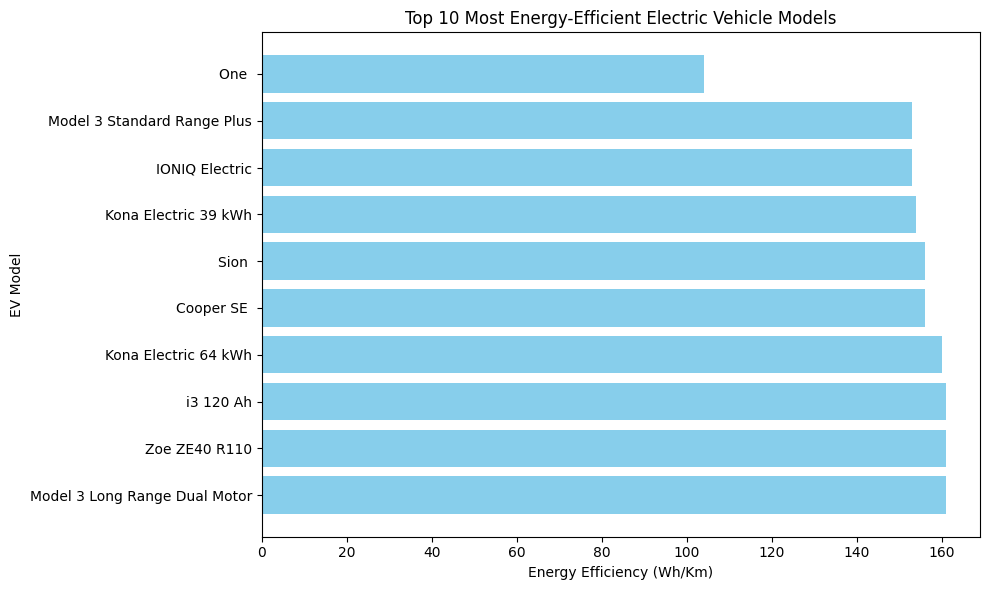

In [197]:
# Sort the dataset by energy efficiency (Efficiency_WhKm) in ascending order
df_sorted = df1.sort_values(by='Efficiency_WhKm', ascending=True)

# Select the top N most efficient models (e.g., top 10)
top_n = 10
top_efficient_models = df_sorted.head(top_n)

# Create a bar plot to visualize the most efficient models
plt.figure(figsize=(10, 6))
plt.barh(top_efficient_models['Model'], top_efficient_models['Efficiency_WhKm'], color='skyblue')
plt.xlabel('Energy Efficiency (Wh/Km)')
plt.ylabel('EV Model')
plt.title(f'Top {top_n} Most Energy-Efficient Electric Vehicle Models')
plt.gca().invert_yaxis()  # Invert the y-axis for the most efficient models at the top

# Display the plot
plt.tight_layout()
plt.show()


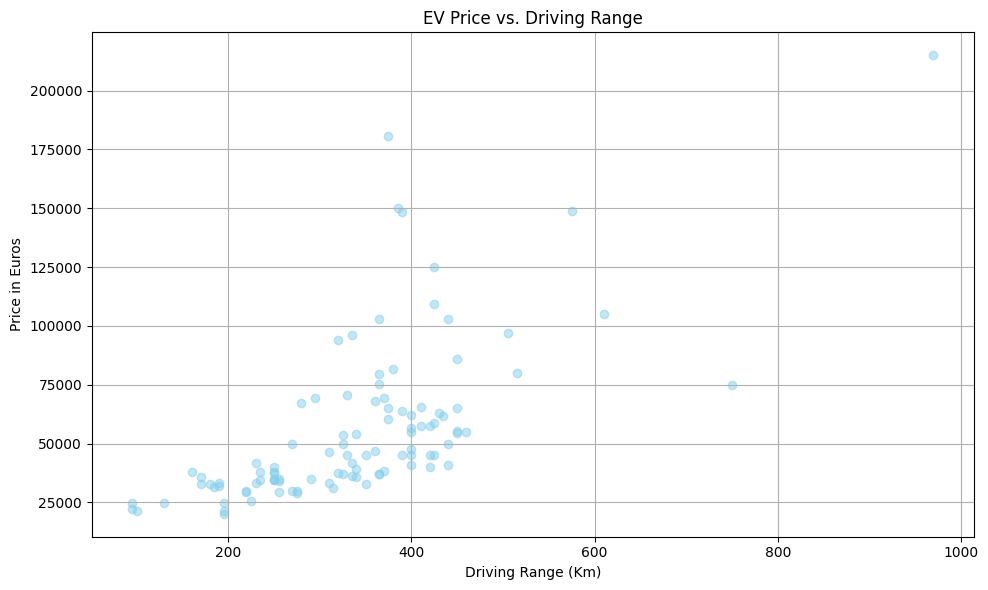

In [198]:
# Select the relevant columns for analysis: Range_Km and PriceEuro
range_price_data = df1[['Range_Km', 'PriceEuro']]

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(range_price_data['Range_Km'], range_price_data['PriceEuro'], color='skyblue', alpha=0.5)
plt.xlabel('Driving Range (Km)')
plt.ylabel('Price in Euros')
plt.title('EV Price vs. Driving Range')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


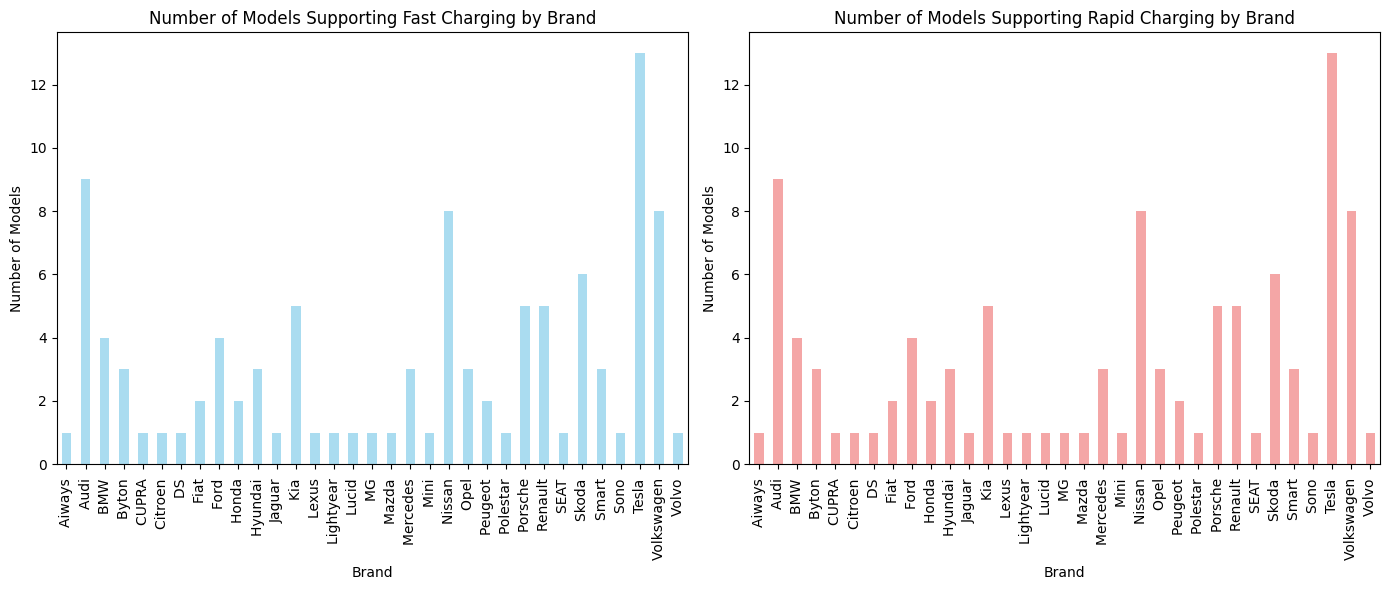

In [199]:

# Grouping the data by 'Brand' and 'FastCharge' to count the number of models supporting fast charging
fast_charge_counts = df1.groupby(['Brand', 'FastCharge_KmH']).size().unstack(fill_value=0)

# Grouping the data by 'Brand' and 'RapidCharge' to count the number of models supporting rapid charging
rapid_charge_counts = df1.groupby(['Brand', 'RapidCharge']).size().unstack(fill_value=0)

# Creating bar plots to visualize the counts for fast charging and rapid charging
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
fast_charge_counts.sum(axis=1).plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.title('Number of Models Supporting Fast Charging by Brand')

plt.subplot(1, 2, 2)
rapid_charge_counts.sum(axis=1).plot(kind='bar', color='lightcoral', alpha=0.7)
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.title('Number of Models Supporting Rapid Charging by Brand')

plt.tight_layout()
plt.show()


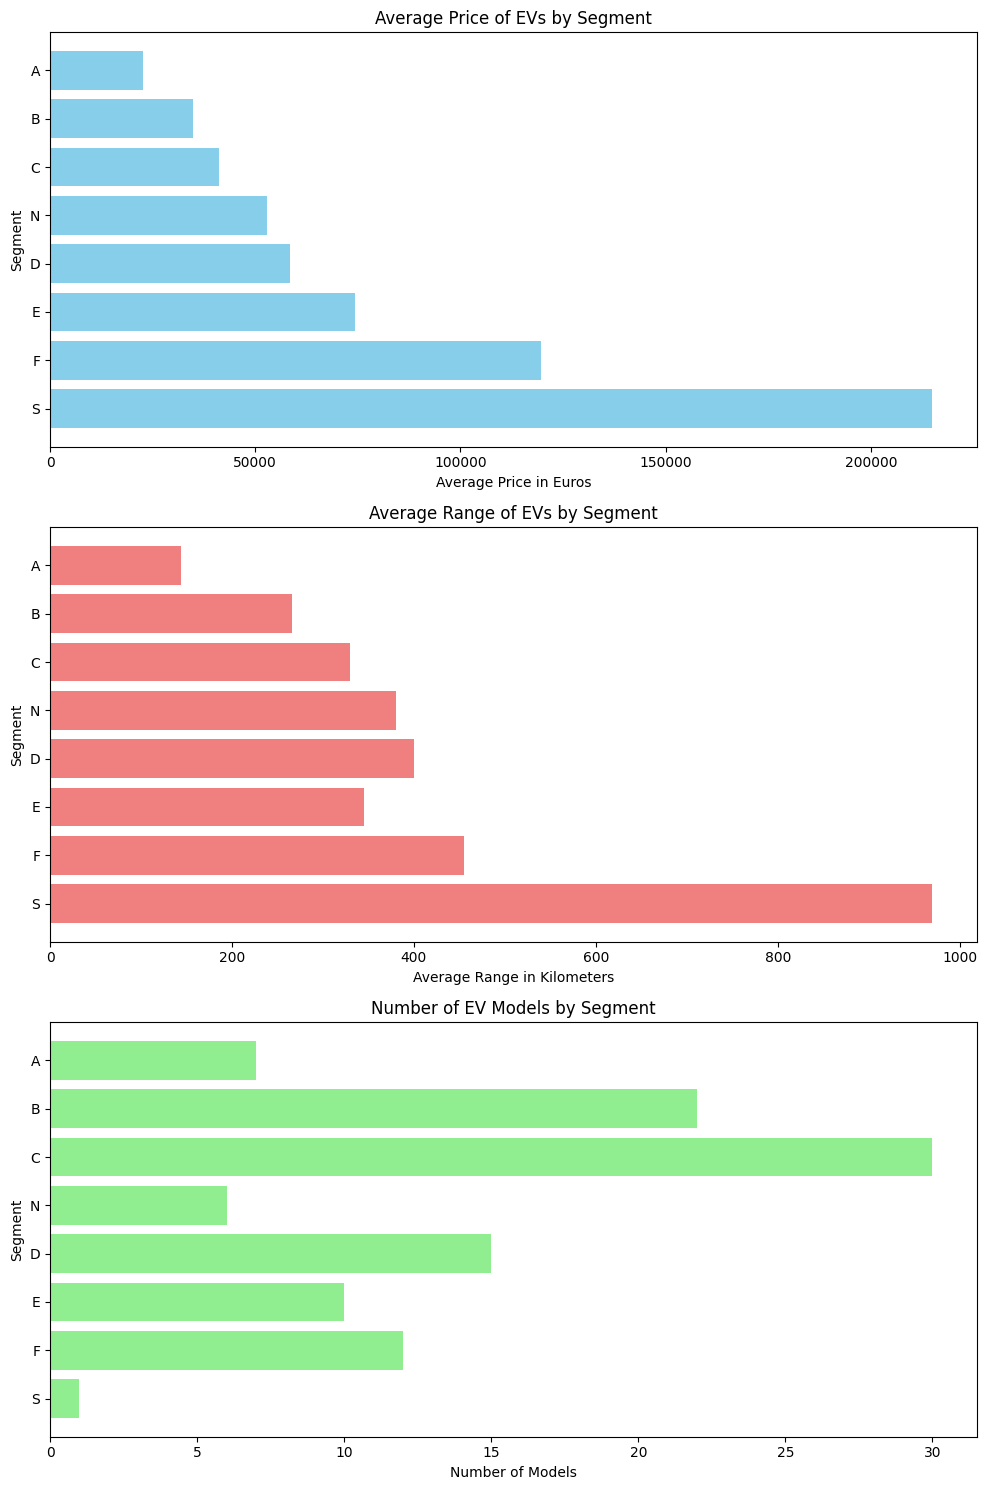

In [200]:


# Grouping the data by 'Segment' and calculating the mean price, mean range, and count of models in each segment
segment_data = df1.groupby('Segment').agg({
    'PriceEuro': 'mean',
    'Range_Km': 'mean',
    'Model': 'count'
}).reset_index()

# Sorting the segments by average price in ascending order
segment_data = segment_data.sort_values(by='PriceEuro', ascending=True)

# Creating subplots to visualize price, range, and count of models in each segment
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting average price by segment
axes[0].barh(segment_data['Segment'], segment_data['PriceEuro'], color='skyblue')
axes[0].set_xlabel('Average Price in Euros')
axes[0].set_ylabel('Segment')
axes[0].set_title('Average Price of EVs by Segment')
axes[0].invert_yaxis()  # Invert the y-axis for the most affordable segments at the top

# Plotting average range by segment
axes[1].barh(segment_data['Segment'], segment_data['Range_Km'], color='lightcoral')
axes[1].set_xlabel('Average Range in Kilometers')
axes[1].set_ylabel('Segment')
axes[1].set_title('Average Range of EVs by Segment')
axes[1].invert_yaxis()  # Invert the y-axis for the longest range segments at the top

# Plotting the count of models by segment
axes[2].barh(segment_data['Segment'], segment_data['Model'], color='lightgreen')
axes[2].set_xlabel('Number of Models')
axes[2].set_ylabel('Segment')
axes[2].set_title('Number of EV Models by Segment')
axes[2].invert_yaxis()  # Invert the y-axis for the segments with the most models at the top

plt.tight_layout()
plt.show()


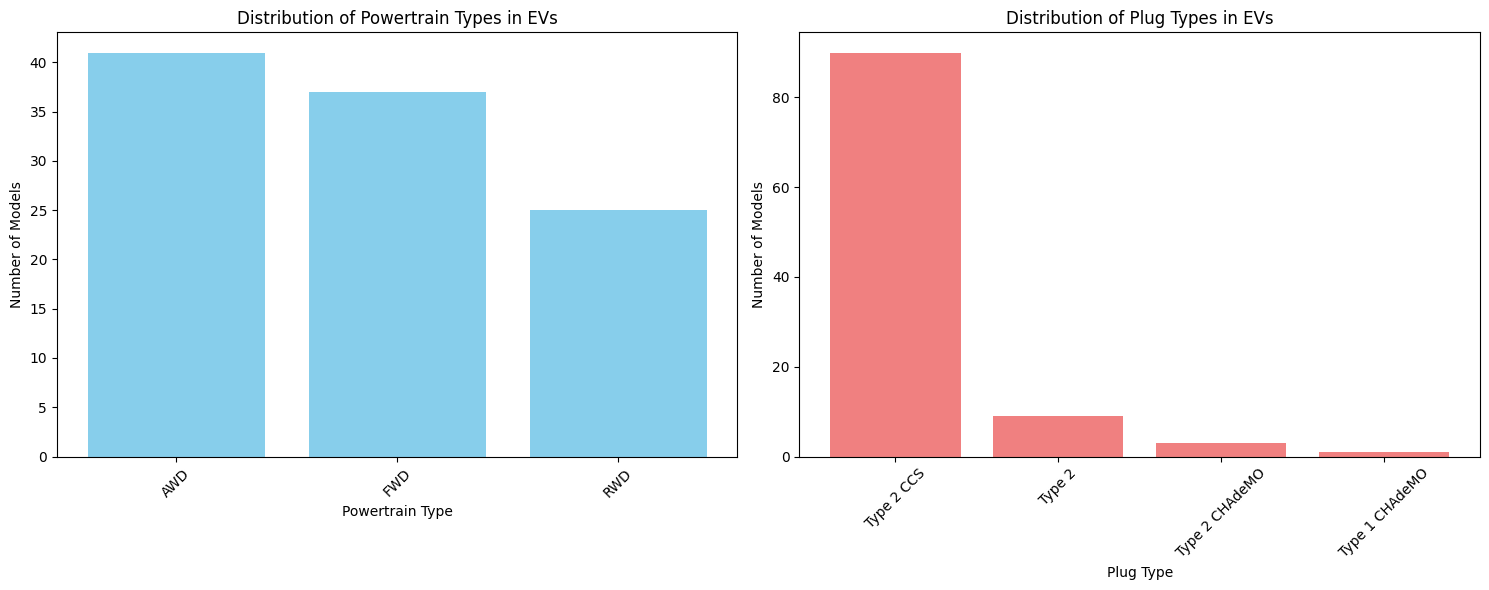

In [201]:

# Count the occurrences of each powertrain type
powertrain_counts = df1['PowerTrain'].value_counts()

# Count the occurrences of each plug type
plug_type_counts = df1['PlugType'].value_counts()

# Create subplots to visualize powertrain and plug type distributions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot powertrain type distribution
axes[0].bar(powertrain_counts.index, powertrain_counts.values, color='skyblue')
axes[0].set_xlabel('Powertrain Type')
axes[0].set_ylabel('Number of Models')
axes[0].set_title('Distribution of Powertrain Types in EVs')

# Plot plug type distribution
axes[1].bar(plug_type_counts.index, plug_type_counts.values, color='lightcoral')
axes[1].set_xlabel('Plug Type')
axes[1].set_ylabel('Number of Models')
axes[1].set_title('Distribution of Plug Types in EVs')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

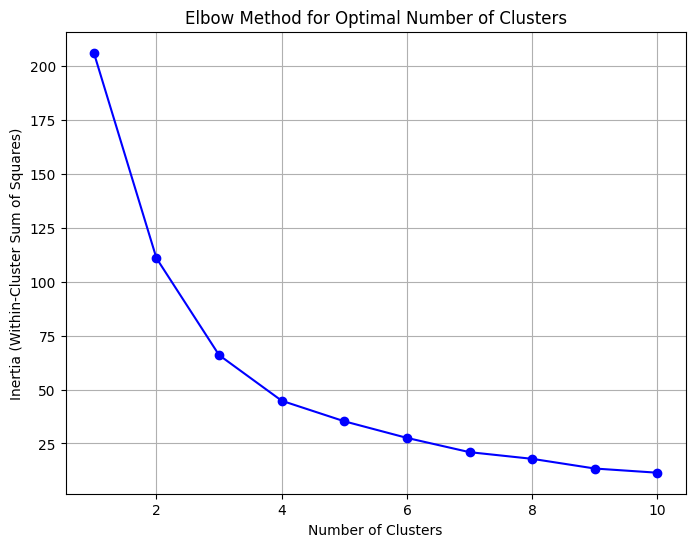

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


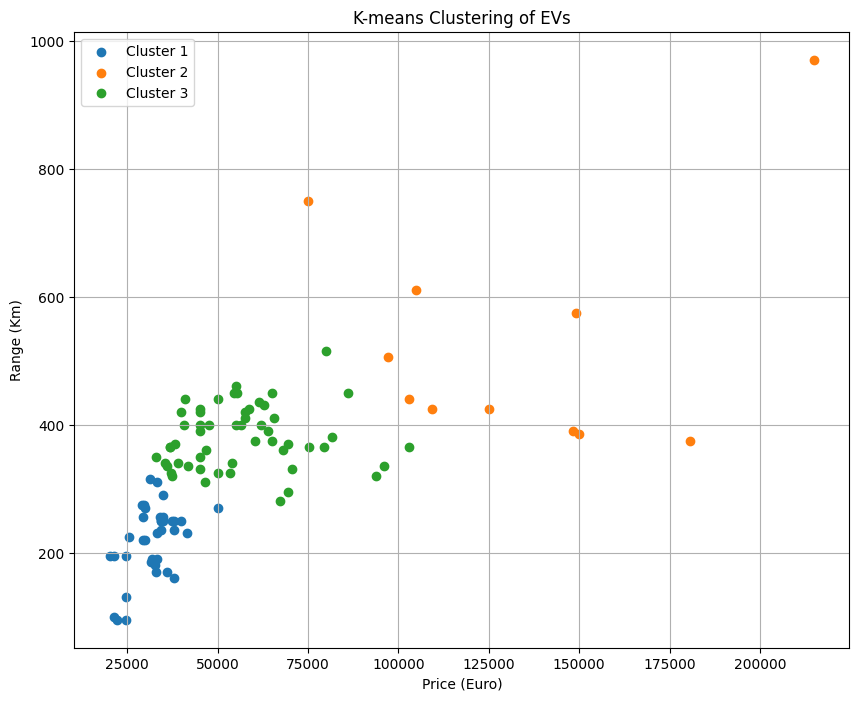

In [202]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features you want to use for clustering
# For example, you can choose 'PriceEuro' and 'Range_Km'
selected_features = ['PriceEuro', 'Range_Km']
X = df1[selected_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters using the elbow method
# In this example, we'll try a range of cluster numbers from 1 to 10
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to select the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Based on the elbow curve, choose the optimal number of clusters and fit the K-means model
# Replace 'n_clusters' with your chosen number
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df1['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    plt.scatter(df1[df1['Cluster'] == cluster]['PriceEuro'], df1[df1['Cluster'] == cluster]['Range_Km'], label=f'Cluster {cluster + 1}')
plt.xlabel('Price (Euro)')
plt.ylabel('Range (Km)')
plt.title('K-means Clustering of EVs')
plt.legend()
plt.grid(True)
plt.show()

# You can further analyze and interpret the clusters and their characteristics


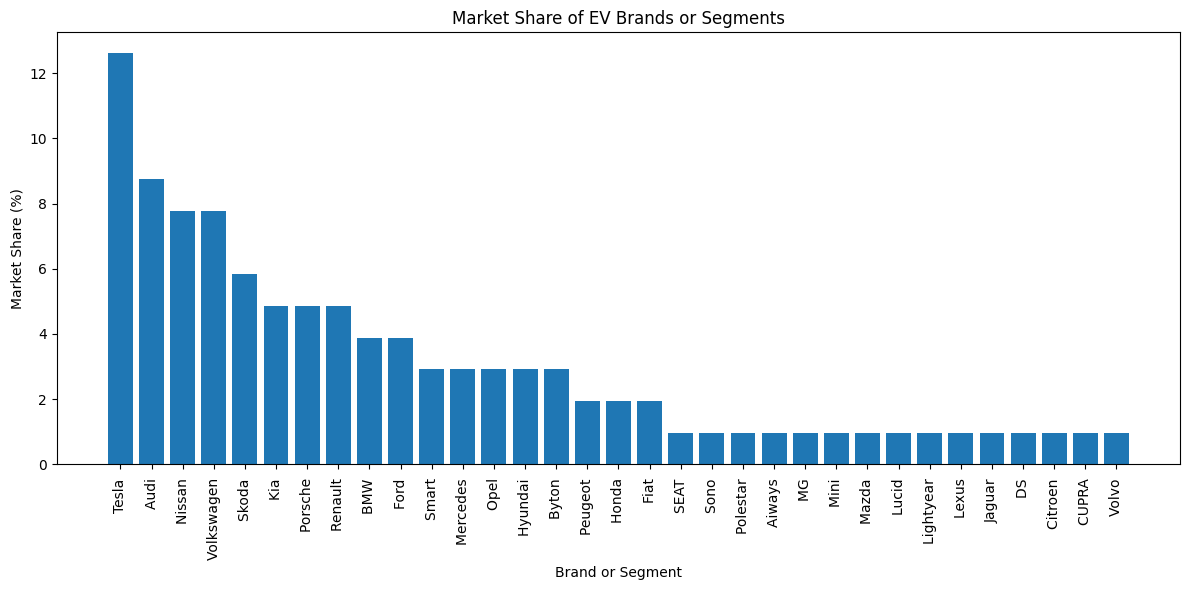

In [203]:

# Group the data by brand or segment and count the number of EVs in each group
brand_market_share = df1.groupby('Brand').size().reset_index(name='Count')

# Calculate the total number of EVs in the dataset
total_ev_count = len(df1)

# Calculate market share as a percentage
brand_market_share['MarketShare'] = (brand_market_share['Count'] / total_ev_count) * 100

# Sort the DataFrame by market share in descending order
brand_market_share = brand_market_share.sort_values(by='MarketShare', ascending=False)

# Plot the market share of brands or segments
plt.figure(figsize=(12, 6))
plt.bar(brand_market_share['Brand'], brand_market_share['MarketShare'])
plt.xlabel('Brand or Segment')
plt.ylabel('Market Share (%)')
plt.title('Market Share of EV Brands or Segments')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**Electric Vehicle Dataset Summary:**

This dataset contains information about various electric vehicle (EV) models, providing details about their characteristics, features, and pricing. The dataset includes the following attributes:

1. **Brand:** The brand or manufacturer of the electric vehicle.

2. **Model:** The specific model name of the electric vehicle.

3. **AccelSec:** The acceleration time from 0 to 100 km/h (or 0 to 60 mph) in seconds, representing the vehicle's speed performance.

4. **TopSpeed_KmH:** The maximum achievable speed of the vehicle in kilometers per hour.

5. **Range_Km:** The driving range on a single charge in kilometers, indicating how far the EV can travel before needing to recharge.

6. **Efficiency_WhKm:** Energy efficiency in watt-hours per kilometer, which measures how efficiently the vehicle uses electricity for propulsion.

7. **FastCharge_KmH:** The speed at which the vehicle can be fast-charged in kilometers per hour, indicating how quickly the battery can be replenished.

8. **RapidCharge:** A binary indicator (Yes/No) that denotes whether the vehicle supports rapid charging.

9. **PowerTrain:** The type of powertrain used in the vehicle, such as All-Wheel Drive (AWD) or Rear-Wheel Drive (RWD).

10. **PlugType:** The type of charging plug used for recharging the vehicle.

11. **BodyStyle:** The body style of the EV, which can include Sedan, SUV, Hatchback, and more.

12. **Segment:** A classification of the vehicle into market segments (e.g., A, B, C, D, E, F) based on size and features.

13. **Seats:** The number of seats available in the vehicle.

14. **PriceEuro:** The price of the electric vehicle in Euros.

**Potential Analyses and Insights:**

1. **Price Comparison:** Analyze the average prices of EVs across different brands to identify which brands offer more affordable or more expensive models.

2. **Efficiency Analysis:** Investigate the energy efficiency (Efficiency_WhKm) of EVs to find which models are the most efficient in terms of energy consumption.

3. **Range vs. Price:** Explore the relationship between the driving range (Range_Km) and the price of EVs to see if higher-priced models generally offer longer ranges.

4. **Charging Capabilities:** Examine the availability of fast charging and rapid charging options among different EV models and brands.

5. **Segment Analysis:** Group EVs by market segment (Segment) and analyze how prices, ranges, and features differ across segments (e.g., SUVs vs. Sedans).

6. **Powertrain and Plug Type:** Investigate the popularity of different powertrain types and plug types among EVs.

7. **Market Trends:** Identify market trends in the electric vehicle industry, such as the emergence of more affordable models or improvements in energy efficiency.

8. **Market Share Analysis:** Analyze the market share of different brands or segments within the electric vehicle market over time to identify market leaders and trends.

These analyses can provide valuable insights into the electric vehicle market, helping consumers make informed choices, manufacturers refine their offerings, and policymakers support sustainable transportation initiatives.

In [159]:
df=pd.read_csv('/content/Vehicles.csv')

In [160]:
df.head()

,Automobile ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Weight Class ID,Category ID,Model,Model Year,City Range,Highway Range,...,Warranty Info,Ordering Info,Description,Comments,Manufacturer,Manufacturer URL,Fuel Code,Fuel,Category,Fuel Configuration Name
0,11636,41,1,211,NaN,27,i3 BEV,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,BMW,www.bmwusa.com,ELEC,Electric,Sedan/Wagon,Dedicated
1,11637,41,1,211,NaN,27,i3 BEV,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,BMW,www.bmwusa.com,ELEC,Electric,Sedan/Wagon,Dedicated
2,11638,41,1,215,NaN,27,Bolt,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,Chevrolet,http://www.chevrolet.com,ELEC,Electric,Sedan/Wagon,Dedicated
3,11639,41,1,379,NaN,27,500e,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,Fiat,http://www.fiatusa.com/,ELEC,Electric,Sedan/Wagon,Dedicated
4,11640,41,1,351,NaN,27,Ioniq,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,Hyundai,http://www.hyundaiusa.com/,ELEC,Electric,Sedan/Wagon,Dedicated


In [161]:
df.describe()

,Automobile ID,Weight Class ID,Highway Fuel Economy,City Gas Fuel Economy,Highway Gas Fuel Economy,Engine Cylinder Count
count,167.000000,13.000000,94.000000,38.000000,42.000000,10.000000
mean,6693.317365,38.230769,85.060319,15.131579,18.023810,0.600000
std,5283.730743,14.330352,111.272067,11.210929,13.466287,1.897367
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,263.000000,25.000000,37.000000,0.000000,0.000000,0.000000
50%,10474.000000,40.000000,86.000000,18.000000,24.000000,0.000000
75%,11263.500000,51.000000,99.000000,22.000000,26.000000,0.000000
max,11644.000000,60.000000,800.000000,30.000000,34.000000,6.000000


In [162]:
df.shape

(167, 35)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Automobile ID               167 non-null    int64  
 1   Fuel ID                     167 non-null    object 
 2   Fuel Configuration ID       167 non-null    object 
 3   Manufacturer ID             145 non-null    object 
 4   Weight Class ID             13 non-null     float64
 5   Category ID                 138 non-null    object 
 6   Model                       133 non-null    object 
 7   Model Year                  167 non-null    object 
 8   City Range                  68 non-null     object 
 9   Highway Range               52 non-null     object 
 10  City Fuel Economy           103 non-null    object 
 11  City Fuel Economy Units     115 non-null    object 
 12  Highway Fuel Economy        94 non-null     float64
 13  Highway Fuel Economy Units  115 non

In [164]:
df.isnull().sum()

Automobile ID                   0
Fuel ID                         0
Fuel Configuration ID           0
Manufacturer ID                22
Weight Class ID               154
Category ID                    29
Model                          34
Model Year                      0
City Range                     99
Highway Range                 115
City Fuel Economy              64
City Fuel Economy Units        52
Highway Fuel Economy           73
Highway Fuel Economy Units     52
City Gas Fuel Economy         129
Highway Gas Fuel Economy      125
Transmission Type              55
Engine Type                    99
Engine Size                   113
Engine Cylinder Count         157
Engine Description            121
Battery Type                   86
Battery Voltage Amps           76
110v Charge Time              138
220v Charge Time              113
Warranty Info                 157
Ordering Info                 150
Description                   102
Comments                      144
Manufacturer  

In [166]:
# Impute missing values for numeric columns with the median
numeric_columns = ['Highway Fuel Economy', 'Engine Size', 'Battery Voltage Amps']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


<ipython-input-166-84b94a61086d>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [169]:
categorical_columns = ['Transmission Type', 'Engine Type', 'Battery Type', 'Manufacturer', 'Manufacturer URL', 'Fuel Code', 'Fuel', 'Category', 'Fuel Configuration Name']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [170]:
columns_to_drop = ['Weight Class ID', 'City Range', 'Highway Range', 'City Gas Fuel Economy', 'Highway Gas Fuel Economy', 'Engine Cylinder Count', 'Engine Description', 'Warranty Info', 'Ordering Info', 'Comments', 'Model']
df = df.drop(columns=columns_to_drop)


In [171]:
df.shape

(167, 24)

In [173]:

# Impute missing values in the 'Manufacturer ID' column with the mode (most frequent value)
df['Manufacturer ID'] = df['Manufacturer ID'].fillna(df['Manufacturer ID'].mode().iloc[0])


In [175]:

# Impute missing values in the 'Category ID' column with the mode (most frequent category)
df['Category ID'] = df['Category ID'].fillna(df['Category ID'].mode().iloc[0])


In [178]:

# Convert the 'City Fuel Economy' column to numeric (float)
df['City Fuel Economy'] = pd.to_numeric(df['City Fuel Economy'], errors='coerce')

# Calculate the median of the numeric values in the 'City Fuel Economy' column
median_city_fuel_economy = df['City Fuel Economy'].median()

# Fill missing values with the median value
df['City Fuel Economy'].fillna(median_city_fuel_economy, inplace=True)


In [181]:
import pandas as pd
import re

# Assuming your DataFrame is named 'df'

# Function to extract numeric values from a string
def extract_numeric(value):
    numeric_values = re.findall(r'\d+\.\d+|\d+', str(value))
    if numeric_values:
        return float(numeric_values[0])
    else:
        return None

# Convert the specified columns to numeric (float)
numeric_columns = ['Battery Voltage Amps', '110v Charge Time', '220v Charge Time']
for column in numeric_columns:
    df[column] = df[column].apply(extract_numeric)

# Calculate the median of the numeric values in each column
median_battery_voltage_amps = df['Battery Voltage Amps'].median()
median_110v_charge_time = df['110v Charge Time'].median()
median_220v_charge_time = df['220v Charge Time'].median()

# Fill missing values with the respective median values
df['Battery Voltage Amps'].fillna(median_battery_voltage_amps, inplace=True)
df['110v Charge Time'].fillna(median_110v_charge_time, inplace=True)
df['220v Charge Time'].fillna(median_220v_charge_time, inplace=True)


In [183]:

# Find the most common unit in the 'City Fuel Economy Units' column
most_common_city_unit = df['City Fuel Economy Units'].mode()[0]

# Impute missing values in 'City Fuel Economy Units'
df['City Fuel Economy Units'].fillna(most_common_city_unit, inplace=True)

# Find the most common unit in the 'Highway Fuel Economy Units' column
most_common_highway_unit = df['Highway Fuel Economy Units'].mode()[0]

# Impute missing values in 'Highway Fuel Economy Units'
df['Highway Fuel Economy Units'].fillna(most_common_highway_unit, inplace=True)


In [187]:

# Remove non-numeric characters and convert to numeric
df['Engine Size'] = df['Engine Size'].str.replace(r'\D', '', regex=True).astype(float)

# Now, you can impute missing values with the median or mean
median_engine_size = df['Engine Size'].median()  # or df['Engine Size'].mean()

# Fill missing values in 'Engine Size' with the calculated value
df['Engine Size'].fillna(median_engine_size, inplace=True)


In [188]:
# Check for missing values
print(df.isnull().sum())

Automobile ID                 0
Fuel ID                       0
Fuel Configuration ID         0
Manufacturer ID               0
Category ID                   0
Model Year                    0
City Fuel Economy             0
City Fuel Economy Units       0
Highway Fuel Economy          0
Highway Fuel Economy Units    0
Transmission Type             0
Engine Type                   0
Engine Size                   0
Battery Type                  0
Battery Voltage Amps          0
110v Charge Time              0
220v Charge Time              0
Description                   0
Manufacturer                  0
Manufacturer URL              0
Fuel Code                     0
Fuel                          0
Category                      0
Fuel Configuration Name       0
dtype: int64


In [204]:
df.shape

(167, 24)

In [205]:

import matplotlib.pyplot as plt
import seaborn as sns

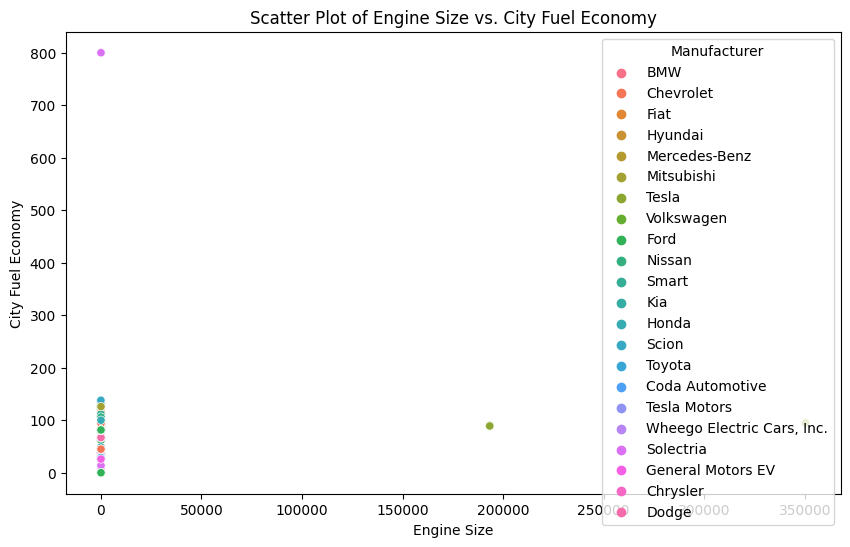

In [206]:

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size', y='City Fuel Economy', data=df, hue='Manufacturer')
plt.title('Scatter Plot of Engine Size vs. City Fuel Economy')
plt.xlabel('Engine Size')
plt.ylabel('City Fuel Economy')
plt.show()

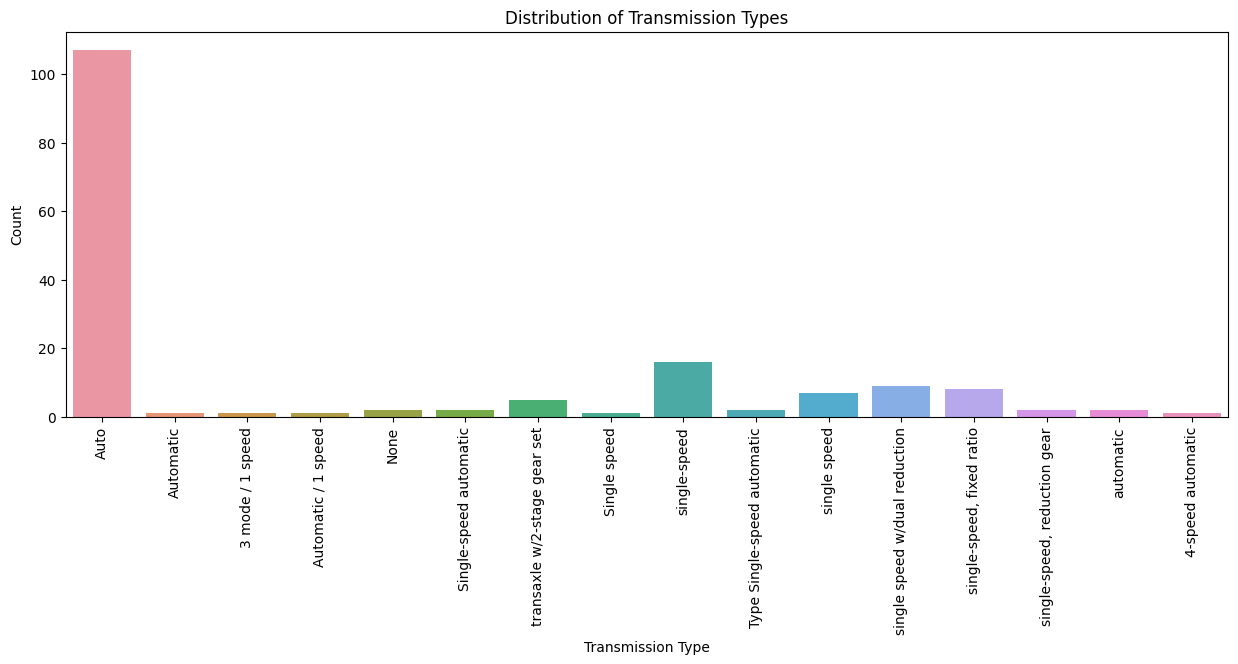

In [209]:
# Bar Chart
plt.figure(figsize=(15, 5))
sns.countplot(x='Transmission Type', data=df)
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

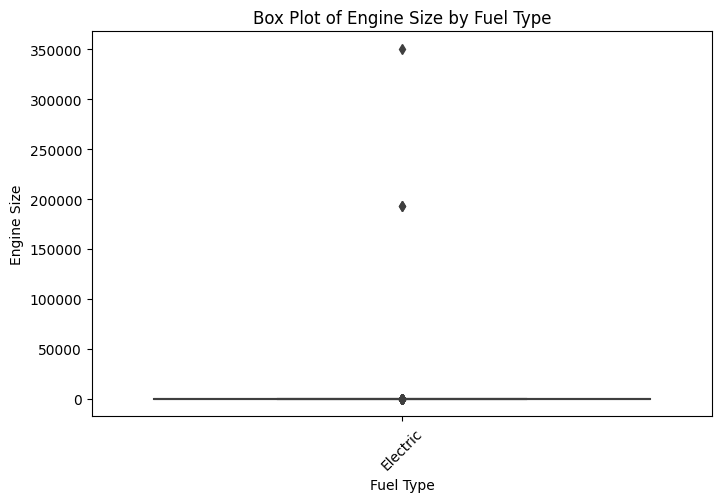

In [211]:
# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel', y='Engine Size', data=df)
plt.title('Box Plot of Engine Size by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Engine Size')
plt.xticks(rotation=45)
plt.show()


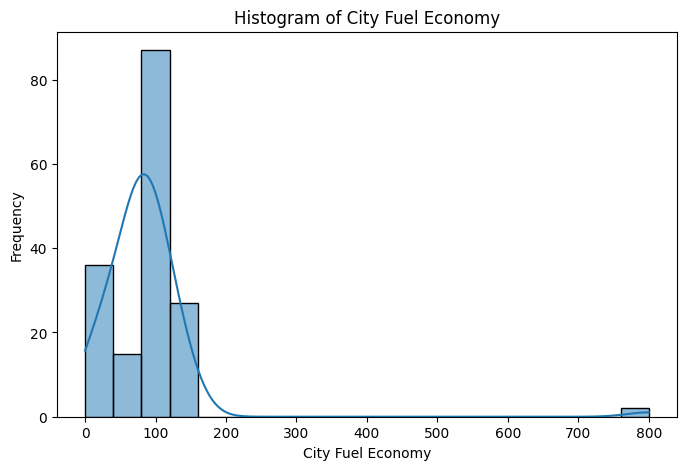

In [212]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['City Fuel Economy'], bins=20, kde=True)
plt.title('Histogram of City Fuel Economy')
plt.xlabel('City Fuel Economy')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

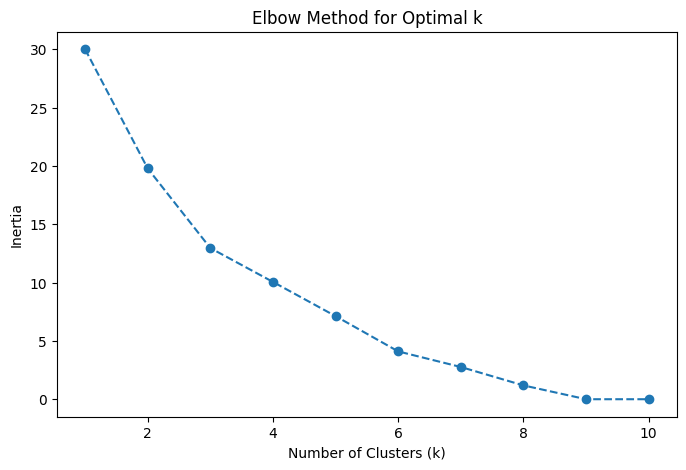

   Fuel Efficiency  Performance  Safety  Cluster
0                4            4       5        1
1                5            3       4        2
2                2            5       4        0
3                3            2       3        2
4                5            3       4        2
5                1            4       3        0
6                2            2       5        1
7                4            5       3        0
8                3            3       4        2
9                2            4       5        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [216]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample customer data (replace with your actual data)
data = {
    'Fuel Efficiency': [4, 5, 2, 3, 5, 1, 2, 4, 3, 2],
    'Performance': [4, 3, 5, 2, 3, 4, 2, 5, 3, 4],
    'Safety': [5, 4, 4, 3, 4, 3, 5, 3, 4, 5]
}

df = pd.DataFrame(data)

# Standardize the data (mean=0, std=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters (k) using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to choose the optimal k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow curve, let's choose k=3 (you can choose a different value)
k = 3

# Perform K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the clustered customer data
print(df)



**Summary:**

- The dataset contains information about automobiles, including various attributes related to their specifications, fuel efficiency, and other details.
- It includes both numeric and categorical attributes.
- The dataset has missing values in several columns, including Manufacturer ID, Weight Class ID, and others.
- It also contains attributes related to fuel efficiency, engine size, battery information, warranty details, and more.

**Potential Objectives and Conclusions:**

1. **Vehicle Analysis:** The dataset seems to focus on providing information about different types of vehicles, including their specifications, engine types, and fuel efficiency. Analysis of this data could help car manufacturers or dealerships understand their product offerings better.

2. **Fuel Efficiency Analysis:** With attributes like "City Fuel Economy" and "Highway Fuel Economy," the dataset may be used to analyze the fuel efficiency of different vehicles. This analysis can help customers make informed decisions about fuel-efficient cars.

3. **Customer Preferences:** Customer reviews and comments could be analyzed to gain insights into customer preferences. For example, by analyzing comments, car manufacturers can understand what customers like or dislike about their vehicles.

4. **Segmentation:** By using clustering techniques, like K-Means, the dataset can be used to segment customers into different groups based on their preferences. For instance, customers who prioritize fuel efficiency, performance, or safety can be identified as distinct segments.

5. **Data Cleaning:** A significant portion of the dataset contains missing values, which need to be handled carefully. Imputing missing values using appropriate techniques is essential for meaningful analysis.

6. **Visualizations:** Various data visualizations, such as scatter plots, box plots, and heatmaps, can be created to gain a better understanding of the relationships and distributions within the data.

7. **Customer Insights:** By analyzing customer comments and reviews, manufacturers can gain insights into specific areas of improvement for their vehicles and potentially make product enhancements.

In conclusion, the dataset appears to be a valuable resource for analyzing vehicle specifications, fuel efficiency, and customer preferences. The objectives can vary from improving products to understanding customer preferences and making data-driven decisions in the automotive industry.